<a href="https://colab.research.google.com/github/MiladB90/Sharp-Concentration-Results-for-Heavy-Tailed-Distributions/blob/main/Plot_Fig_1_Sharp_Concentration_Results_for_Heavy_Tailed_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
from time import time
from os import path, makedirs

from google.colab import files, drive

drive.mount('/content/gdrive/')
if not path.exists('gdrive/MyDrive/concentration/'):
  makedirs('gdrive/MyDrive/concentration/')

%cd 'gdrive/MyDrive/concentration/'
!ls

Mounted at /content/gdrive/
/content/gdrive/MyDrive/concentration


In [ ]:
%cd 'test_runs/'
!ls

/content/gdrive/.shortcut-targets-by-id/1nRA7iBxrx6yfLR_KBhkJDyfvG2V8gv-M/concentration/test_runs
'alpha=2.5_m=10^5_it=10^4.pdf'	'alpha=5_m=10^2_it=10^5.pdf'
'alpha=2_m=10^2_it=10^7.pdf'	'alpha=5_m=10^2_it=10^6.pdf'
'alpha=2_m=10^2_it=10^8.pdf'	'alpha=5_m=10^4_it=10^4.pdf'
'alpha=2_m=10^5_it=10^6.pdf'	'alpha=5_m=10^5_it=10^4.pdf'
'alpha=5_m=10^2_it=10^4.pdf'


In [ ]:
def mean_z_to_power(k:int):
  
  if k < 0:
    return None
  
  if k%2 == 1:
    return 0
  elif k == 0:
    return 1
  else:
    return (k - 1) * mean_z_to_power(k - 2)

def var_z_to_power(k:int):

  return mean_z_to_power(2 * k) - mean_z_to_power(k)**2


def get_t_max(alpha, m, var):

  ans = (.5 * var)** (alpha / (2 * alpha - 1))
  ans *= m ** (-(alpha - 1)/ (2 * alpha - 1))

  return ans

def get_c_t(alpha, m, t, var):

  coef = .25 * var
  coef *= m ** ((1/alpha) - 1)
  coef *= t ** ((1/alpha) - 2)

  return 1 - coef

def bound_larg_t_region(m, t, var, alpha):
  from numpy import exp, power

  ct = get_c_t(alpha=alpha, m=m, t=t, var=var)
  coef1 = - ct * 0.5 * power(m * t, 1 / alpha)
  coef2 = - 0.5 * power(m * t, 1 / alpha)

  return exp(coef1) + m * exp(coef2)

def bound_small_t_region(m, t, var, t_max):
  from numpy import exp

  if t > t_max:
    print('Wrong region')
    return None

  coef1 = - m * (t**2) / (2 * var)
  coef2 = - m * (t_max ** 2) / var

  return exp(coef1) + m * exp(coef2)

def simulate(test_size = 10**4, repeat=10):
  import numpy as np
  import torch
  from time import time

  start = time()
  pow_mean = np.array([])
  for i in range(repeat):  
    if i%1000 == 1:
      print('repeat ', i, ' is running')
    guassian_matrix = torch.randn(test_size, m, device='cuda')
    pow_guassian = guassian_matrix ** pow
    pow_mean_tensor = torch.mean(pow_guassian, dim=1)
    pow_mean = np.append(pow_mean, np.array(pow_mean_tensor.to('cpu')))

  print('calculation time is', str(time() - start)[:4])
  print('test_size is 10^', np.log10(pow_mean.size))

  return pow_mean
  

t_max is  41.603771615708666
repeat  1  is running
repeat  1001  is running
repeat  2001  is running
repeat  3001  is running
repeat  4001  is running
repeat  5001  is running
repeat  6001  is running
repeat  7001  is running
repeat  8001  is running
repeat  9001  is running
repeat  10001  is running
repeat  11001  is running
repeat  12001  is running
repeat  13001  is running
repeat  14001  is running
repeat  15001  is running
repeat  16001  is running
repeat  17001  is running
repeat  18001  is running
repeat  19001  is running
repeat  20001  is running
repeat  21001  is running
repeat  22001  is running
repeat  23001  is running
repeat  24001  is running
repeat  25001  is running
repeat  26001  is running
repeat  27001  is running
repeat  28001  is running
repeat  29001  is running
repeat  30001  is running
repeat  31001  is running
repeat  32001  is running
repeat  33001  is running
repeat  34001  is running
repeat  35001  is running
repeat  36001  is running
repeat  37001  is runn

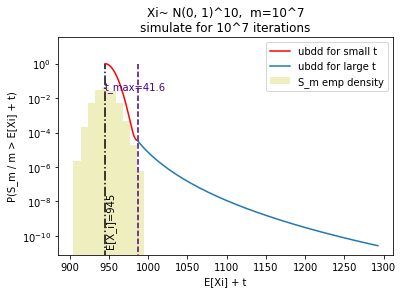

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


alpha = 5
pow = 2 * alpha
var = var_z_to_power(pow)
mean = mean_z_to_power(pow)

m = 10**7
t_max = get_t_max(alpha=alpha, m=m, var=var)

print('t_max is ', t_max)

pow_mean = simulate(test_size = 10**2, repeat=10**5)
coef = 1.3
plot_end = max(np.max(pow_mean), t_max) * coef - mean

region1 = np.arange(t_max, plot_end, .1)
bound_region1 = [bound_larg_t_region(m=m, t=x, var=var, alpha=alpha) for x in region1]

region2 = np.arange(0, t_max, .01)
bound_region2 = [bound_small_t_region(m=m, t=x, var=var, t_max=t_max) for x in region2]


plt.plot(region2 + mean, bound_region2, color='red')
plt.plot(region1 + mean, bound_region1)


# plt.xlim(xmin = mean + left_indent*1.5)
plt.ylabel('P(S_m / m > E[Xi] + t)')
plt.xlabel('E[Xi] + t')

title = 'Xi~ N(0, 1)^' + str(int(pow)) + ',  m=10^' + str(round(np.log10(m)))
title += '\nsimulate for 10^' + str(round(np.log10(pow_mean.size))) + ' iterations'
plt.title(title)

plt.yscale('log')
print(plt.gca().get_xlim())

  
plt.hist(pow_mean, density=True, color='y', alpha=.25)
# plt.yscale('log')
# plt.xlabel('S_m')
plt.legend(['ubdd for small t', 'ubdd for large t',
            'S_m emp density'], loc='upper right')


tmax_color = 'indigo'

plt.vlines(x=[mean, t_max + mean], ymin=0, ymax= 1, color=['k', tmax_color], linestyles=['-.', '--'])
ymax= 10 * (plt.gca().get_ylim()[1])
plt.ylim(ymax= ymax)
left_indent = - .05
right_indent = 1
mean_loc =  mean + left_indent
plt.text(x= mean_loc, y=bound_region1[-1], s='E[X_i]=' + str(round(mean, 2)), color='k', rotation=90)

# tmax_loc = (plt.gca().get_xlim()[1] + 9 * (t_max + mean))/10
# tmax_loc = t_max + mean + right_indent
tmax_loc = mean + .2
plt.text(x= tmax_loc, y= ymax / 10**3, s='t_max=' + str(round(t_max, 2)), color=tmax_color, rotation=0)



plot_name = 'alpha=' + str(alpha) + '_m=10^' + str(round(np.log10(m))) + '_it=10^' + str(round(np.log10(pow_mean.size))) + '.pdf'
plt.savefig(plot_name)
plt.show()


In [ ]:
t_max, plot_end, np.max(pow_mean)
torch.cuda.empty_cache()
del pow_mean

calculation time is 18.7
test_size is 10^ 7.0


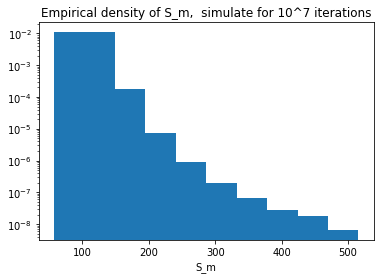

In [ ]:





test_size = 10**4

def simulate(test_size = 10**4, repeat=10):

  start = time()
  pow_mean = np.array([])
  for i in range(repeat):  
    guassian_matrix = torch.randn(test_size, m, device='cuda')
    pow_guassian = guassian_matrix ** pow
    pow_mean_tensor = torch.mean(pow_guassian, dim=1)
    pow_mean = np.append(pow_mean, np.array(pow_mean_tensor.to('cpu')))

  print('calculation time is', str(time() - start)[:4])
  print('test_size is 10^', np.log10(pow_mean.size))

  return pow_mean
pow_mean = simulate(repeat=1000)  
plt.hist(pow_mean, density=True)
plt.yscale('log')
plt.xlabel('S_m')
plt.title('Empirical density of S_m,  simulate for 10^' + str(round(np.log10(pow_mean.size))) + ' iterations')
plt.show()



In [ ]:
a = torch.tensor([[1, 2, 5], [3, 4., 6]])
# print(a, a * a, a**3, torch.mean(a, dim=0))
torch.mean(pow_guassian)

tensor(104.8401, device='cuda:0')

In [ ]:
a = var_z_to_power(10)
print(a, np.log10(a), a / 10**8)

653836050 8.81546886222852 6.5383605
